In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./data/wdbc.data", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X=df.iloc[:,2:].values
y=df.iloc[:,1].values

# Encoding

In [5]:
from sklearn.preprocessing  import LabelEncoder
le=LabelEncoder()

In [6]:
y=le.fit_transform(y)

In [7]:
le.classes_  , le.transform(["M", "B"])

(array(['B', 'M'], dtype=object), array([1, 0]))

# Splitting

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3,  stratify=y, random_state=42)

# Combining transformers and estimators in a pipeline

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [10]:
pipe_lr=make_pipeline( StandardScaler(), 
                      PCA(n_components=2),
                      LogisticRegression(solver="lbfgs")
                         )

In [11]:
pipe_lr.fit(X_train , y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [12]:
y_pred=pipe_lr.predict(X_test)

In [13]:
print(f' Test Accuracy  :{pipe_lr.score(X_test, y_test):.3f}')

 Test Accuracy  :0.942


In [14]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(pipe_lr, 
                      X_train, y_train, cv=10, n_jobs=-1)

In [15]:
print(f'CV   Accuracy Scores : {scores}')

CV   Accuracy Scores : [0.95       0.95       1.         1.         0.95       0.95
 0.9        0.925      0.94871795 0.87179487]


In [16]:
print(f'CV   Accuracy  : {np.mean(scores):.3f}+/- {np.std(scores) :.3f}')

CV   Accuracy  : 0.945+/- 0.037


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# Diagnosing bias and variance problems with learning curves

In [18]:
pipe_lr=make_pipeline(
StandardScaler(),
    PCA(),
    LogisticRegression( penalty='l2', random_state=42, solver="lbfgs", max_iter=15000)
)

In [23]:
from sklearn.model_selection import learning_curve

train_size, train_score, test_score =learning_curve(
    pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1, 10 ), cv=10 , n_jobs=-1
)

In [20]:
train_mean=np.mean(train_score, axis=1)
train_std= np.std (train_score, axis=1)
test_mean= np.mean(test_score,  axis=1)
test_std=  np.std (test_score,  axis=1)

In [21]:
def plotGraph(x, y1, y2, y1std, y2std, scl, lbl):    
    plt.plot(x, 
             y1, 
                     color="blue", marker="o", markersize=5, label="Training Accuracy")
    plt.fill_between(
        x, 
        y1 +y1std, 
        y1-y1std, 
                        color="blue", alpha=0.15)

    plt.plot(x, 
             y2, 
                     color="green", marker="s",linestyle="--", markersize=5, label="Validation Accuracy")
    plt.fill_between(
                    x, 
                    y2 +y2std, 
                    y2-y2std, 
                        color="green", alpha=0.15)

    plt.grid()
    plt.xlabel(lbl) #" Number of Training Example")
    plt.xscale(scl)
    plt.ylabel("Accuracy ")
    plt.legend(loc="lower right")
    plt.ylim([0.8, 1.01])
    plt.show()

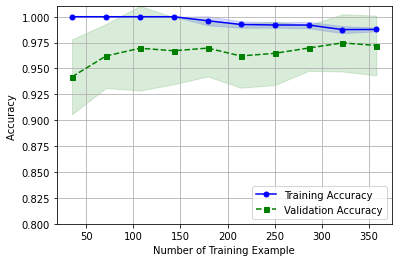

In [22]:
plotGraph(train_size, train_mean, test_mean, 
          train_std, test_std,"linear", "Number of Training Example")

# Addressing over- and underfitting with validation curves

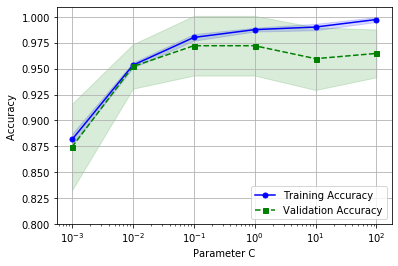

In [25]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_score, test_score =validation_curve(
    estimator=pipe_lr, X=X_train, y=y_train, param_name="logisticregression__C", param_range=param_range, cv=10

)
train_mean=np.mean(train_score, axis=1)
train_std= np.std (train_score, axis=1)
test_mean= np.mean(test_score,  axis=1)
test_std=  np.std (test_score,  axis=1)

# plt.plot(param_range, train_mean, 
#         color="blue", 
#          marker="o",
#          markersize=5, 
#          label="Training Accuracy "
#         )
plotGraph(param_range, train_mean, test_mean, train_std, test_std, "log", "Parameter C")

# Fine-tuning machine learning models via grid search
###  Tuning hyperparameters via grid search

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1,1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {'svc__C': param_range,'svc__kernel': ['linear']},
    
    {'svc__C': param_range,'svc__gamma': param_range,'svc__kernel': ['rbf']}
            ]

gs=GridSearchCV(pipe_svc, param_grid=param_grid, scoring="accuracy", cv=10, refit=True, n_jobs=-1)    



In [27]:
gs.fit(X_train, y_train)   

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False, random_state=1,
                                            shrinking=True,...
                                verbose=Fals

In [28]:
print(f"Best Score. : {gs.best_score_}")
print(f"Best Params :{gs.best_params_}")

Best Score. : 0.9696794871794872
Best Params :{'svc__C': 100.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [32]:
# The GridSearchCV class has a refit parameter, which will refit the gs.best_estimator_ 
# to the whole training set automatically if we set refit=True (default).
clf = gs.best_estimator_

In [33]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=100.0, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.01,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [34]:
print(f' Test Accuracy  :{clf.score(X_test, y_test):.3f}')

 Test Accuracy  :0.965


# Algorithm selection with nested cross- validation

In [35]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)
                  
                  

In [36]:
scores=cross_val_score( gs, X_train, y_train, cv=5, scoring="accuracy")

In [38]:
print(f'CV Accuracy. : {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

CV Accuracy. : 0.967 +/- 0.022


In [40]:
from sklearn.tree import DecisionTreeClassifier
gs=GridSearchCV( DecisionTreeClassifier(random_state=42, ), 
                param_grid=[
                    { 'max_depth':np.arange(1,7), }
                    
                ],
                scoring="accuracy", cv=2
               )

In [41]:
scores= cross_val_score( gs, X_train, y_train, cv=5, scoring="accuracy" )

In [42]:
print(f'CV Accuracy. : {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

CV Accuracy. : 0.919 +/- 0.046


In [51]:
from sklearn.metrics import confusion_matrix
cfMatrix=confusion_matrix(y_test, y_pred)

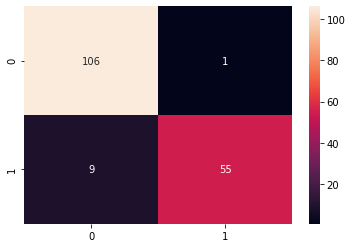

In [55]:
import seaborn as sns
df_cm = pd.DataFrame(
        cfMatrix
    )
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

# I. AWS SAgeMaker python SDK 

In [49]:
import io
import csv
import boto3

### DataPartition

### UploadData 2 S3

In [ ]:
key='{}/{}/examples'.format(prefix, data_partition_name)
boto3.Session().ressource("s3").Bucket(bucket).Object(key).upload_file('data.csv')


### Train the Model

In [ ]:
# Import Amazon SageMaker
import sagemaker
from sagemaker.amazon.amazon_estimator import get_image_uri
container=get_image_uri(boto3.Session().region_name, 'xgboost')

In [ ]:
# Training & Validation data.    + Set the location for the training output
train_data='s3://{}/{}'.format(bucket, prefix, 'train')
validation_data='s3://{}/{}/{}'.format(bucket, prefix, 'validaton')
s3_Output_location='s3://{}/{}/{}'.format(bucket, prefix, 'xgboot_model_sdk')


In [ ]:
# Create an instance of sageMaker
xgboost_model=sagemaker.estimator.Estimator(
                        container, 
                        role, 
    train_instance_count=1,
    train_volume_size=5,
    output_path=s3_output_location,
    sagemaker_session=sagemaker.Session()
    
)

In [ ]:
# Set the hyperParameters
xgb_model.set_hyperparameters{
    max_depth=.2,
    gamma=4,
    min_child_weight=6,
    silent=0,
    objective="multi:softmax",
    num_calss=10,
    num_round=10
}

### Training Channel

In [ ]:
train_channel=sagemaker.session.s3_input(train_data, content_type='text/csv')
valid_channel=sagemaker.session.s3_input(validation_data, content_type="text/csv")

data_channels={'train':train_channel, 'validation':valid_channel}

### Start Model Training

In [ ]:
xgb_model.fit( inputs=data_channels, logs=True)

### III Deploy the Model 

In [ ]:
xgb_predictor=xgb_model.deploy( initial_instance_count=1,
                              instance_type="ml.m4.xlarge")


## II AWS SDK for Python Boto3

In [ ]:
import sagmeker
from sagemaker.amazon.amazon_estimator import get_image_uri
container=get_image_uri(boto3.Session().region_name, 'xgboost')

### Setup the training Information fro the JOb

In [ ]:
common_training_params={
    "AgorithmSepcification":{ 
        "TrainingImage":container,
        "TrainingInputMode":"File"},
    "RoleArn":role,
    "OutputDataConfig":{
        "S3OutputPath":bucket_path +"/"+prefix +"/xgboost"
    },
    "RessourceConfig":{
        "InstanceCount":1,
        "InstanceType":"ml.m4.xlarge",
        "VolumeSizeInGB":5
    },
    "HyperParameters":{
        "max_depth":"5",
        "eta":"0.2",
        "gamma":"4",
        "min_child_weight":"6",
        "silent":"0",
        "objective":"multi:softmax",
        "num_class":"10",
        "num_round":"10"
    },
    "StoppingCondition":{
        "MaxRuntimeInSeconds":86400
    },
    "InputDataConfig":[
        {
            "ChannelName":"train",
            "DataSource":{
                "S3DataSource":{
                    "S3DataType":"S3Prefix"
                }
            }
            "ContentTyep":"text/csv",
            "CompressionType":"None"
        },
         {
            "ChannelName":"validation",
            "DataSource":{
                "S3DataSource":{
                    "S3DataType":"S3Prefix",
                    "S3Uri":bucket_path+ "/"+prefix +"/validation",
                    "S3DataDistributionType":"FullyReplicated"
                }
            }
            "ContentTyep":"text/csv",
            "CompressionType":"None"
        }
    ]
    }
    


In [ ]:
# Name your Training Job
training_job_name="xgboost-minst"+strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print("JOb Name is :", training_job_Name)
training_job_params=copy_deepcopy(common_training_params)
training_job_params["TainingJobName"]=training_job_name
training_job_params["RessouceConfig"]['InstanceCount']=1

### Sart the training JOb

In [ ]:
region=boto3.Session().region_name
sm=boto3.Session().client('sagemaker')
sm.create_training_job(**training_job_params)


In [ ]:
status=sm.describe_training_job(TrainingJobName=training_job_name)["TainingJobStatus"]
print(status)

sm.get_waiter("training_job_completed_or_stopped").wait(TrainingJobName=training_job_name)["TrainingJobStatus"]
print("Training Jpn Ended with Status :" + status)

if status =="Failed" :
    message =sm.describe_training_job(TrainnigJobName=training_job_name)["Failurereason"]
    print("Training failed with the following error : { }".format(message))
    raise Exception("Training job failed")

### Deploy the Model

In [ ]:
model_name=training_job_name+"-mod"
info=sm.decribe_training_job(TrainingJObName=training_job_name)
model_data=infro["ModelArtifacts"]["S3ModelArtifacts"]
print(model_data)


primary_container={
    "Image":container,
    "ModelDataUrl":model_data
}

create_model_response=sm.create_model(
    ModelName=model_name,
    ExecutionRoleArn=role,
    PrimaryContainer=primary_container)
print( create_model_response["ModelArn"])

### Create SAgeMaker Endpoint

In [ ]:
endpoint_config_name="DEMO-XGBOOST-EndPointConfig-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print(endpoint_config_name)

create_endpoint_config_response=sm.create_endpoint_config(
    EndpointConfigName=endpoint_config_name,
    ProductionVariants=[
        {
            "InstanceType": "ml.m4.xlarge",
            "InitialVariantWeight":1,
            "InitialInstanceCount":1,
            "ModelName":model_name,
            "VariantName":'AllTraffic'
        }
    ])
print( "Endpoint Config Arn :" + create_endpoint_config_response["EndpointConfigArn"])

In [74]:
 !pip3 install tensorflow

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [ ]:
pl=np.array([5,10])
qr=np.array([1,0])
rho=0
bulk=4
